In [1]:
# Ignore anoying warnings
import warnings
warnings.filterwarnings("ignore")

# Importing all usefull libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn import set_config
set_config(display='diagram')

%matplotlib inline

In [2]:
# Loading data for model building
telecom = pd.read_csv("Churn_Model_Building_Data.csv")

# Showing first 5 rows from data set
telecom.head()

,account_length,voice_messages,intl_plan,intl_mins,intl_calls,day_mins,eve_charge,night_mins,customer_calls,churn
0,128,25.0,0,10.0,3.0,265.1,16.78,244.7,1.0,0
1,107,26.0,0,13.7,3.0,161.6,16.62,254.4,1.0,0
2,137,0.0,0,12.2,5.0,243.4,10.30,162.6,0.0,0
3,84,0.0,1,6.6,7.0,299.4,5.50,196.9,2.0,0
4,75,0.0,1,10.1,3.0,166.7,12.61,186.9,3.0,0


In [3]:
# Defining independent (x) & dependent (y) variables for model building purpose

x = telecom.iloc[:,:-1]
y = telecom['churn']

In [4]:
# Target column value count
y.value_counts()

0    4293
1     707
Name: churn, dtype: int64

## Balancing Data :
- **As we see in above target column value counts, the data is imbalanced.** 
- **For balancing that data we use `RandomOverSampler()`.**

In [5]:
# Creating a RandomOverSampler object
ros = RandomOverSampler()

# Fitting the RandomOverSampler to the independent & dependent features & perform the oversampling
x, y = ros.fit_resample(x, y)

# Verify that the dataset is balanced
print(y.value_counts())

0    4293
1    4293
Name: churn, dtype: int64


- ***Standardize features by removing the mean and scaling to unit variance.***

In [6]:
# Creating object for StandardScaler()
sc = StandardScaler()

# Standardizing independent (x) features
x = sc.fit_transform(x)

In [7]:
# Splitting data into train & test sets to avoid overfitting & model building purpose
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.25, random_state=1)

# 1. Logistic Regression :

In [8]:
# Creating object for LogisticRegression()
lg = LogisticRegression()

# Fitting the model on training data
lg.fit(xtrain,ytrain)

# Prediction
lg_pred = lg.predict(xtest)

In [9]:
# Training & Testing accuracy
print('Training Accuracy : ', lg.score(xtrain,ytrain))
print('Testing Accuracy : ', lg.score(xtest,ytest))

Training Accuracy :  0.7364497592793912
Testing Accuracy :  0.7368421052631579


In [10]:
# Showing the main classification metrics
print(classification_report(ytest,lg_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1068
           1       0.75      0.71      0.73      1079

    accuracy                           0.74      2147
   macro avg       0.74      0.74      0.74      2147
weighted avg       0.74      0.74      0.74      2147



Text(50.722222222222214, 0.5, 'Predicted Values')

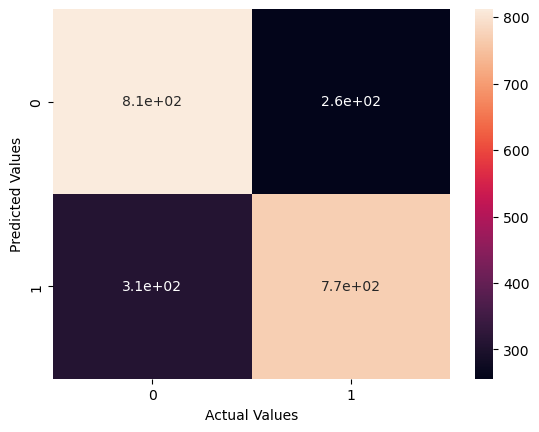

In [11]:
# Computing confusion matrix to evaluate the accuracy of a classification.

sns.heatmap(confusion_matrix(ytest,lg_pred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [12]:
# Accuracy classification score.
accuracy_score(ytest,lg_pred)

0.7368421052631579

# 2. Random Forests Classifier :

In [13]:
# Create object for RandomForestClassifier()
rf = RandomForestClassifier()

# Fitting the model on training data
rf.fit(xtrain,ytrain)

# Prediction
rf_pred = rf.predict(xtest) 

In [14]:
# Training & Testing accuracy
print('Training Accuracy : ', rf.score(xtrain,ytrain))
print('Testing Accuracy : ', rf.score(xtest,ytest))

Training Accuracy :  1.0
Testing Accuracy :  0.9911504424778761


In [15]:
# Showing the main classification metrics
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1068
           1       0.98      1.00      0.99      1079

    accuracy                           0.99      2147
   macro avg       0.99      0.99      0.99      2147
weighted avg       0.99      0.99      0.99      2147



Text(50.722222222222214, 0.5, 'Predicted Values')

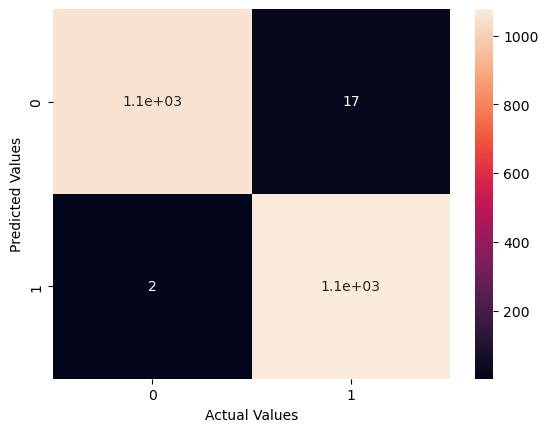

In [16]:
# Compute confusion matrix to evaluate the accuracy of a classification.

sns.heatmap(confusion_matrix(ytest,rf_pred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [17]:
# Accuracy classification score.
accuracy_score(ytest,rf_pred)

0.9911504424778761

# 3. GradientBoostingClassifier :

In [18]:
# Create object for GradientBoostingClassifier()
gb = GradientBoostingClassifier()

# Fitting the model on training data
gb.fit(xtrain,ytrain)

# Prediction
gb_pred = gb.predict(xtest)

In [19]:
# Training & Testing accuracy
print('Training Accuracy : ', gb.score(xtrain,ytrain))
print('Testing Accuracy : ', gb.score(xtest,ytest))

Training Accuracy :  0.9131852772169592
Testing Accuracy :  0.9082440614811365


In [20]:
# Showing the main classification metrics
print(classification_report(ytest,gb_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1068
           1       0.94      0.87      0.91      1079

    accuracy                           0.91      2147
   macro avg       0.91      0.91      0.91      2147
weighted avg       0.91      0.91      0.91      2147



Text(50.722222222222214, 0.5, 'Predicted Values')

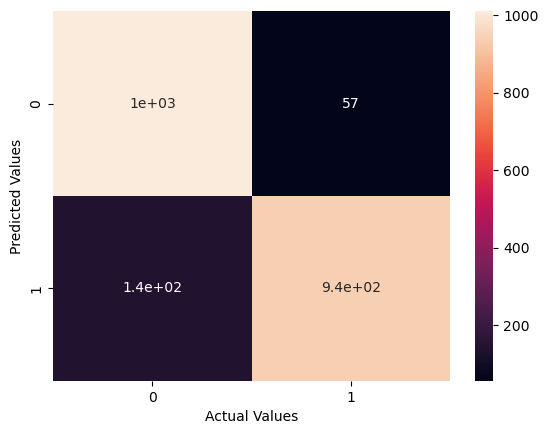

In [21]:
# Compute confusion matrix to evaluate the accuracy of a classification.

sns.heatmap(confusion_matrix(ytest,gb_pred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [22]:
# Accuracy classification score.
accuracy_score(ytest,gb_pred)

0.9082440614811365

# 4. Support Vector Machines [SVM] :

In [23]:
# Create object for svm()
svm = svm.SVC()

# Fitting the model on training data
svm.fit(xtrain,ytrain)

# Prediction
svm_pred = svm.predict(xtest)

In [24]:
# Training & Testing accuracy
print('Training Accuracy : ', svm.score(xtrain,ytrain))
print('Testing Accuracy : ', svm.score(xtest,ytest))

Training Accuracy :  0.9065072216182637
Testing Accuracy :  0.8858872845831393


In [25]:
# Showing the main classification metrics
print(classification_report(ytest,svm_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1068
           1       0.90      0.87      0.88      1079

    accuracy                           0.89      2147
   macro avg       0.89      0.89      0.89      2147
weighted avg       0.89      0.89      0.89      2147



Text(50.722222222222214, 0.5, 'Predicted Values')

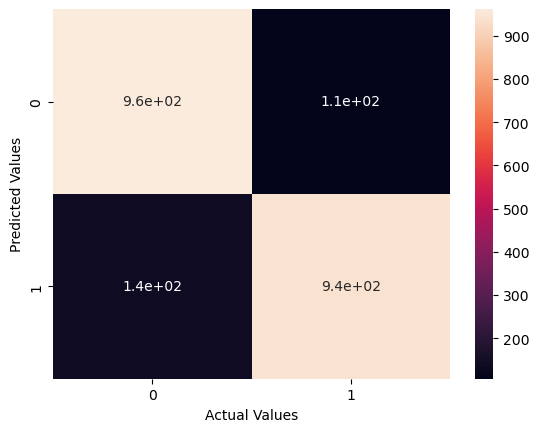

In [26]:
# Compute confusion matrix to evaluate the accuracy of a classification.

sns.heatmap(confusion_matrix(ytest,svm_pred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [27]:
# Accuracy classification score.
accuracy_score(ytest,svm_pred)

0.8858872845831393

# 5. Decision Tree Classifier :

In [28]:
# Create object for DecisionTreeClassifier()
dt = DecisionTreeClassifier()

# Fitting the model on training data
dt.fit(xtrain,ytrain)

# Prediction
dt_pred = dt.predict(xtest)

In [29]:
# Training & Testing accuracy
print('Training Accuracy : ', dt.score(xtrain,ytrain))
print('Testing Accuracy : ', dt.score(xtest,ytest))

Training Accuracy :  1.0
Testing Accuracy :  0.9767116907312529


In [30]:
# Showing the main classification metrics
print(classification_report(ytest,dt_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1068
           1       0.96      1.00      0.98      1079

    accuracy                           0.98      2147
   macro avg       0.98      0.98      0.98      2147
weighted avg       0.98      0.98      0.98      2147



Text(50.722222222222214, 0.5, 'Predicted Values')

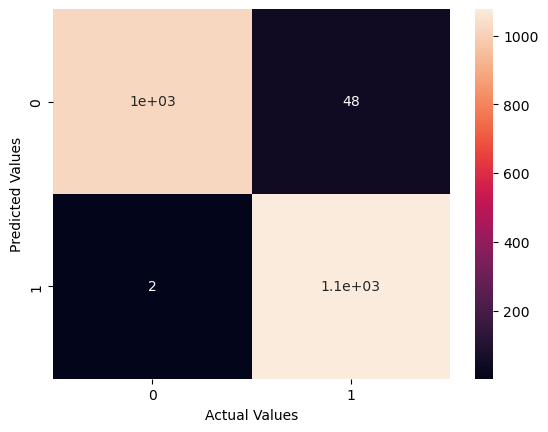

In [31]:
# Compute confusion matrix to evaluate the accuracy of a classification.

sns.heatmap(confusion_matrix(ytest,dt_pred), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [32]:
# Accuracy classification score.
accuracy_score(ytest,dt_pred)

0.9767116907312529

In [33]:
# Creating dataframe for created models & their accuracy
model_acc = pd.DataFrame()

# Column for all created models
model_acc['Model'] = ['Logistic Regrassion','Random Forests','GradientBoostingClassifier','SVM','DecisionTreeClassifier']

# Column for their accuracy
model_acc['Accuracy'] = [accuracy_score(ytest,lg_pred), accuracy_score(ytest,rf_pred), accuracy_score(ytest,gb_pred), 
                        accuracy_score(ytest,svm_pred), accuracy_score(ytest,dt_pred)]

# Show the Dataframe
model_acc

,Model,Accuracy
0,Logistic Regrassion,0.736842
1,Random Forests,0.991150
2,GradientBoostingClassifier,0.908244
3,SVM,0.885887
4,DecisionTreeClassifier,0.976712


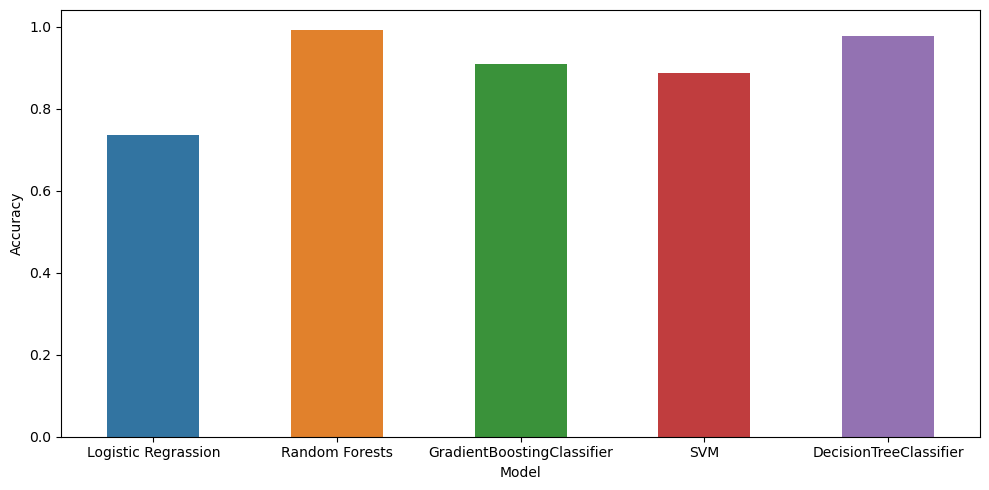

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x=model_acc['Model'], y=model_acc['Accuracy'], data=model_acc, width=0.5)
plt.tight_layout()
plt.show()

### `Random Forests Classifier` algorithm gives high accuracy than other algorithms.
- **Performing `KFold cross-validation` & hyperparameter tunning on `Random Forests Classifier` algorithm.**

In [35]:
# Evaluate the model's performance
print(classification_report(ytest, rf_pred))
print("AUC-ROC Score:", roc_auc_score(ytest, rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1068
           1       0.98      1.00      0.99      1079

    accuracy                           0.99      2147
   macro avg       0.99      0.99      0.99      2147
weighted avg       0.99      0.99      0.99      2147

AUC-ROC Score: 0.9911144144425585


In [36]:
# Performing k-fold cross-validation to check the model's generalization performance
kfold = KFold(n_splits=5, random_state=1, shuffle=True)
cv_scores = cross_val_score(rf, x, y, cv=kfold)

print("KFold Cross-validation scores :", cv_scores)
print("\nKFold Cross-validation Accuracy Score : {:.2f}%".format(cv_scores.mean() * 100))

KFold Cross-validation scores : [0.99359721 0.98893419 0.99242865 0.99009901 0.99126383]

KFold Cross-validation Accuracy Score : 99.13%


In [37]:
# Tune hyperparameters using grid search
param_grid = {'n_estimators': [100, 300, 500],
              'criterion' : ["gini", "entropy"],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]}

# Exhaustive search over specified parameter values for an estimator.
grid = GridSearchCV(rf, param_grid = param_grid)

# Fitting data into grid
grid.fit(xtrain, ytrain)

# Print the best hyperparameters
print("Best hyperparameters :", grid.best_params_)

Best hyperparameters : {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 500}


In [38]:
# Fitting the model with the best hyperparameters & evaluate performance
model = RandomForestClassifier(**grid.best_params_)

# Fitting data into tunned model
model.fit(xtrain, ytrain)

# Prediction 
rf_pred_best = model.predict(xtest)

print("Best model performance :")
print("\nAUC-ROC Score :", roc_auc_score(ytest, rf_pred_best))
print(classification_report(ytest, rf_pred_best))

Best model performance :

AUC-ROC Score : 0.9906605679416021
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1068
           1       0.99      1.00      0.99      1079

    accuracy                           0.99      2147
   macro avg       0.99      0.99      0.99      2147
weighted avg       0.99      0.99      0.99      2147



In [39]:
# Calculating accuracy score for tunned random forests model
acc = accuracy_score(ytest, rf_pred_best)

# Print accuracy as a percentage
print("Accuracy : {:.2f}%".format(acc * 100))

Accuracy : 99.07%


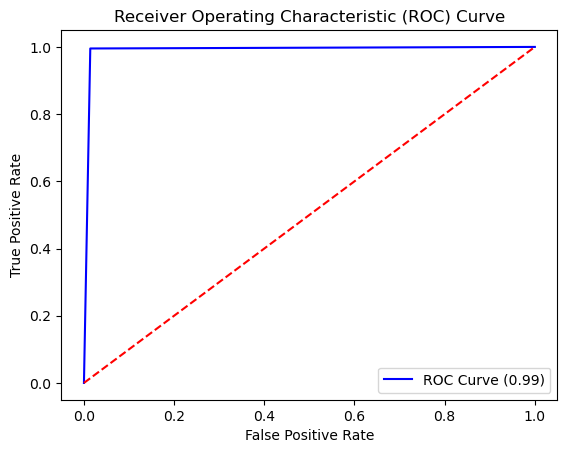

In [40]:
# The true labels in ytest & predicted probabilities in rf_pred_best

'''The roc_curve function is used to compute the True Positive Rate (TPR) & False Positive Rate (FPR)
at various probability thresholds. These values are stored in tpr, fpr & thresholds.'''

fpr, tpr, thresholds = roc_curve(ytest, rf_pred_best) # Computing Receiver Operating Characteristic (ROC)
roc_auc = auc(fpr, tpr) # Computing Area Under the Curve (AUC)

# Plotting the ROC curve
plt.plot(fpr, tpr, color='blue', label='ROC Curve (%0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

- ***ROC curve shows a perfect classifier, it means that the `Random Forest Classifier` model is able to perfectly distinguish between the positive & negative classes.***

# Pipeline :

In [41]:
from sklearn.compose import ColumnTransformer

In [42]:
# Creating one transformer for StandardScaler()
transformer = ColumnTransformer(transformers=[
    ('trf1', StandardScaler(),[0,8])
], remainder='passthrough')

In [43]:
# Creating pipeline
pipe = Pipeline(steps=[('transformer', transformer),
                        ('model', model)])

In [44]:
# Fitting pipeline on training data
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1', StandardScaler(),
                                                  [0, 8])])),
                ('model',
                 RandomForestClassifier(max_depth=15, n_estimators=500))])

In [45]:
# Prediction
pipe_pred = pipe.predict(xtest)

In [46]:
print(classification_report(ytest,pipe_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1068
           1       0.99      0.99      0.99      1079

    accuracy                           0.99      2147
   macro avg       0.99      0.99      0.99      2147
weighted avg       0.99      0.99      0.99      2147



In [47]:
# Prediction accuracy
accuracy_score(ytest,pipe_pred)

0.9902189101071263

In [48]:
# Output feature names for transformation
pipe.get_feature_names_out

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1', StandardScaler(),
                                                  [0, 8])])),
                ('model',
                 RandomForestClassifier(max_depth=15, n_estimators=500))])>

In [49]:
pipe.named_steps

{'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('trf1', StandardScaler(), [0, 8])]),
 'model': RandomForestClassifier(max_depth=15, n_estimators=500)}

In [50]:
cross_val_score(pipe,xtrain,ytrain,cv=5,scoring='accuracy').mean()

0.9824505204939987

# Save the final model :

In [51]:
import pickle

In [54]:
pickle.dump(pipe, open('Telecom_Churn_Prediction.pkl', 'wb'))